In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr

In [2]:
dfMENSAL = pd.read_excel('BASE_MENSAL_GARE_MAI.xlsx')
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS ATUAIS':'last',
                                                                      'CATEGORIAS ANTIGAS':'first','Participação_sup':'sum','ENTRADA_GARE15':'first','ENTRADA_GALG15':'first','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS ATUAIS':'last',
                                                                    'CATEGORIAS ANTIGAS':'first','Participação_sup':'sum','ENTRADA_GARE15':'first','ENTRADA_GALG15':'first','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

o valor de compra é 66127931.42 e o valor de venda é 66127931.42, e o total é 132255862.84


In [3]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 99.99999999999997 e o total de venda é 100.0


In [4]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,13237163.46,Compra PF,20.02,0-1k
1,1,Compra,PJ,1349003.43,Compra PJ,2.04,0-1k
2,2,Compra,PF,12203207.76,Compra PF,18.45,1k-5k
3,2,Compra,PJ,530872.82,Compra PJ,0.80,1k-5k
4,3,Compra,PF,13570336.27,Compra PF,20.52,5k-20k
5,3,Compra,PJ,818049.74,Compra PJ,1.24,5k-20k
6,4,Compra,PF,9458011.82,Compra PF,14.30,20k-50k
7,4,Compra,PJ,325982.89,Compra PJ,0.49,20k-50k
8,5,Compra,PF,4131774.39,Compra PF,6.25,50k-100k
9,5,Compra,PJ,600565.27,Compra PJ,0.91,50k-100k


In [5]:
plim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CATEGORIAS        15 non-null     int64  
 1   OPERAÇÃO          15 non-null     object 
 2   PF_PJ             15 non-null     object 
 3   VAR_PRECO         15 non-null     float64
 4   OPERAÇÃO_PF_PJ    15 non-null     object 
 5   % PARTICIPAÇÃO    15 non-null     float64
 6   CLASSE_CATEGORIA  15 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 972.0+ bytes


In [6]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-2960133.43,Venda PF,-4.48,0-1k
1,1,Venda,PJ,-8925.79,Venda PJ,-0.01,0-1k
2,2,Venda,PF,-5813059.77,Venda PF,-8.79,1k-5k
3,2,Venda,PJ,-14832.94,Venda PJ,-0.02,1k-5k
4,3,Venda,PF,-8779529.26,Venda PF,-13.28,5k-20k
5,3,Venda,PJ,-290838.90,Venda PJ,-0.44,5k-20k
6,4,Venda,PF,-9139992.48,Venda PF,-13.82,20k-50k
7,4,Venda,PJ,-305365.55,Venda PJ,-0.46,20k-50k
8,5,Venda,PF,-6922414.23,Venda PF,-10.47,50k-100k
9,5,Venda,PJ,-98332.35,Venda PJ,-0.15,50k-100k


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_17584\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())


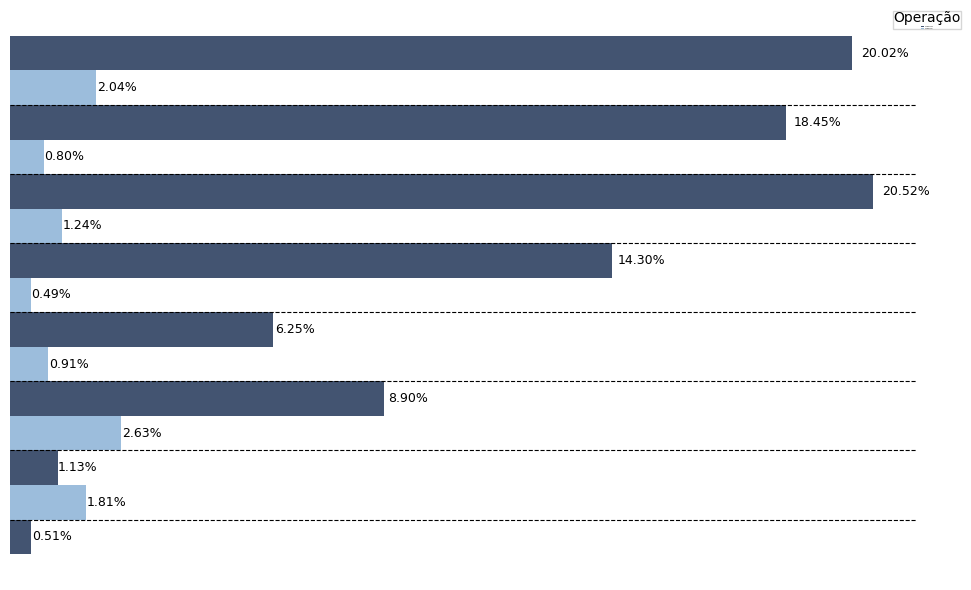

In [7]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_17584\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())


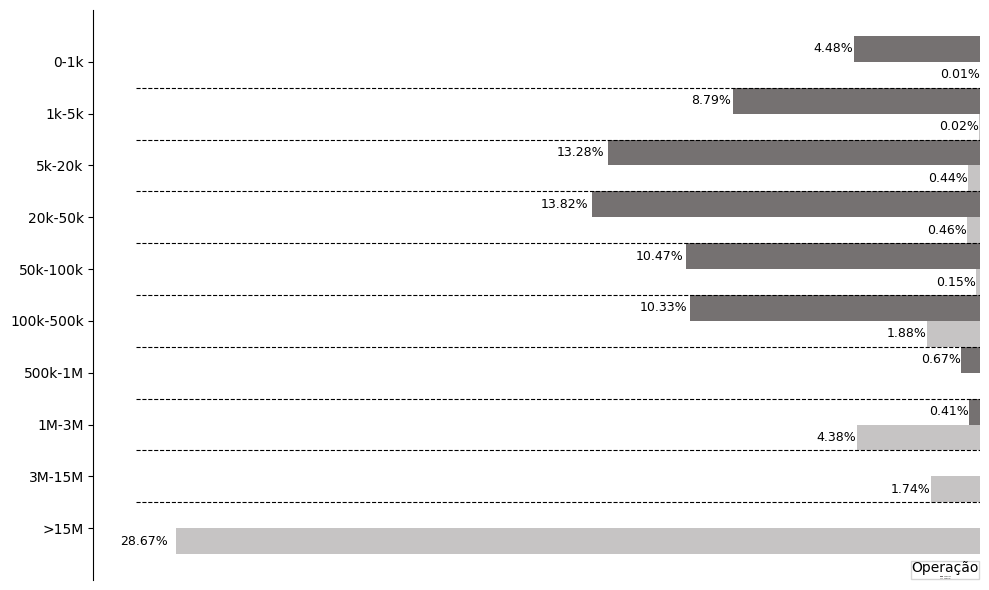

In [8]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [9]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
of = 'ENTRADA_GARE15'
of2 = 'ENTRADA_GALG15'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais,of,of2]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS,ENTRADA_GARE15,ENTRADA_GALG15
NOME,,,,,,
XTX MARKETS TRADING LIMITED,500k-1M,PJ,1194412.60,1M-3M,AUSENTE,AUSENTE
PLINIO HAIDAR FILHO,100k-500k,PF,780800.00,1M-3M,AUSENTE,AUSENTE
MONIQUE PENTEADO RODRIGUES HAIDAR,100k-500k,PF,780800.00,1M-3M,AUSENTE,AUSENTE
LEONARDO CARVALHO NASCIMENTO,500k-1M,PF,716000.00,1M-3M,GARE15,AUSENTE
RIGEL COVE LP,100k-500k,PJ,384669.85,50k-100k,AUSENTE,AUSENTE
VERA CRUZ BRASIL SERVICOS LTDA,100k-500k,PJ,360596.88,100k-500k,AUSENTE,AUSENTE
MARCUS VINICIUS SIMONETTI RIBEIRO DE CASTRO,100k-500k,PJ,304300.00,100k-500k,AUSENTE,AUSENTE
DENISE THOMAZ TEIXEIRA,100k-500k,PJ,298930.00,100k-500k,AUSENTE,AUSENTE
CARLOS ANDRE BRANCO GUIMARAES,100k-500k,PF,297648.54,500k-1M,AUSENTE,GALG15


In [10]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS ATUAIS'] = TOP10_Venda['CATEGORIAS ATUAIS'].fillna('0-1k')

TOP10_Venda.set_index('NOME')

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS,ENTRADA_GARE15,ENTRADA_GALG15
NOME,,,,,,
AAA FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO PRIVADO INVES,>15M,PJ,18959088.64,>15M,AUSENTE,AUSENTE
DAYCOVAL D9 FUNDO DE INVESTIMENTO IMOBILIRIO,1M-3M,PJ,1865282.95,0-1k,AUSENTE,AUSENTE
BRL VI FI IMOBILIARIO,3M-15M,PJ,1148606.48,3M-15M,AUSENTE,AUSENTE
XTX MARKETS TRADING LIMITED,1M-3M,PJ,1033678.78,500k-1M,AUSENTE,AUSENTE
HUGO CARLOS LANG FILHO,100k-500k,PF,447500.00,100k-500k,GARE15,AUSENTE
ANA MARIA GRACIA GUITIAN RUIZ,500k-1M,PF,441000.00,100k-500k,AUSENTE,AUSENTE
RIGEL COVE LP,100k-500k,PJ,420450.02,0-1k,AUSENTE,AUSENTE
SAMY BOTSMAN,100k-500k,PF,409929.80,100k-500k,AUSENTE,AUSENTE
ROGERIO GOMES PONTES,100k-500k,PF,407136.04,100k-500k,GARE15,GALG15


In [11]:
gare11 = ['GARE11.SA']
fundos = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA', 'HGRU11.SA',
          'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
          'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA',
          'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'JSRE11.SA',
          'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 'AIEC11.SA',
          'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA']
peers_diretos = ['KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA',
                 'HGRU11.SA', 'TRXF11.SA', 'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA',
                 'BTLG11.SA', 'XPLG11.SA', 'BRCO11.SA', 'LVBI11.SA', 'VILG11.SA', 'GARE11.SA']
tijolo = ['HIB Tijolo', 'XXXX', 'Renda Urbana', 'Logistico', 'Shopping', 'Lajes', 'Outros Imóveis']

def excluir_5_dig(COTA):
    return str(COTA)[:6]

def peers(x):
    if x in peers_diretos:
        return 'PEER'
    else:
        return 'NAO PEER'
    
def tijolo_papel(x):
    if x == 'Recebivel':
        return "Papel"
    elif x == "XXXX":
        return "Tijolo"
    else:
        return "Tijolo"


In [12]:
base_ativos = pd.read_excel('Base_ativos.xlsx')
pd.options.display.float_format
base_ativos = base_ativos.drop(columns = ['SUP', 'COTISTAS', 'COTAS', 'DIV Y1', 'DIV Y12'])
#base_ativos['VP MM'] = base_ativos['VP MM'].apply(lambda x: "{:,.0f}".format(x))
#base_ativos['LIQUIDEZ - MÉDIA'] = base_ativos['LIQUIDEZ - MÉDIA'].apply(lambda x: "{:,.0f}".format(x))
#base_ativos['LIQUIDEZ - SOMA'] = base_ativos['LIQUIDEZ - SOMA'].apply(lambda x: "{:,.0f}".format(x))
base_ativos['MACRO'] = base_ativos['TIPO'].apply(tijolo_papel)

base_tijolo = base_ativos.query('MACRO == "Tijolo"')

base_ativos

,TICKER,TIPO,VP MM,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,MACRO
0,KNRI11.SA,HIB Tijolo,4.560890e+09,6.989821e+06,40704210.66,Tijolo
1,TVRI11.SA,HIB Tijolo,1.617486e+09,1.217778e+06,4432151.47,Tijolo
2,ALZR11.SA,HIB Tijolo,1.273443e+09,3.124385e+06,10322534.59,Tijolo
3,GARE11.SA,XXXX,1.335037e+09,4.538339e+06,40368352.54,Tijolo
4,RBRP11.SA,HIB Tijolo,9.295963e+08,1.186562e+06,6195276.66,Tijolo
...,...,...,...,...,...,...
107,SPXS11.SA,Recebivel,1.899494e+08,3.482384e+05,3900471.12,Papel
108,ARRI11.SA,Recebivel,1.761529e+08,2.310802e+05,711365.70,Papel
109,CYCR11.SA,Recebivel,3.436678e+08,5.079344e+05,2729412.09,Papel
110,CLIN11.SA,Recebivel,4.247399e+08,7.068968e+05,3581910.21,Papel


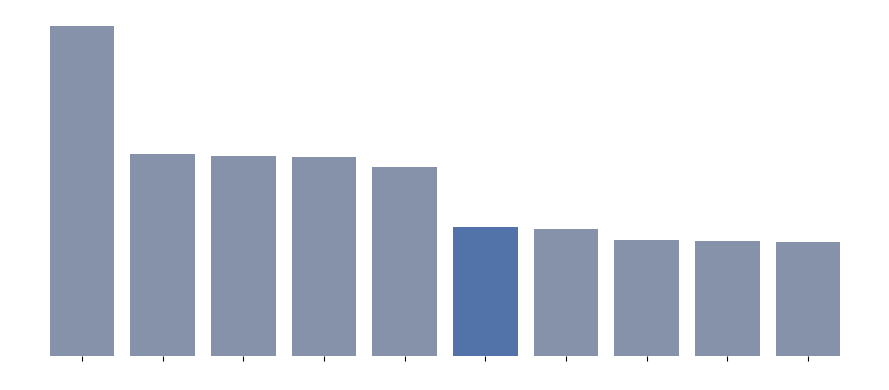

In [13]:
tic = 'TICKER'
liq = 'LIQUIDEZ - MÉDIA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ = base_tijolo[[tic, liq, pl]]
TOP10_LIQUIDEZ = TOP10_LIQUIDEZ.sort_values(by=['LIQUIDEZ - MÉDIA'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ['TICKER'] = TOP10_LIQUIDEZ['TICKER'].apply(excluir_5_dig)
TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA'] = TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA']/1000 

# Dados fornecidos
data = TOP10_LIQUIDEZ

# Criar o DataFrame
df = pd.DataFrame(data)

# Definir as cores para destacar o GARE11.SA
cores = ['#8592AA' if fundo != 'GARE11' else '#5173A9' for fundo in df['TICKER']] 

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQUIDEZ - MÉDIA'], color=cores)

# Adicionar rótulos de barra com separadores de milhares (usando ponto)
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:,.0f}'.replace(',', '.'),  # Formatar com separador de milhares como ponto
        ha='center', va='bottom', color='white', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_title('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=360)

for tick in ax.get_xticklabels():
    tick.set_color('white')

ax.spines['bottom'].set_color('white')
plt.tight_layout()

fig.savefig('TOP10_LIQUIDEZ_MÉDIA.png', transparent = True, dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_17584\1221087330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']


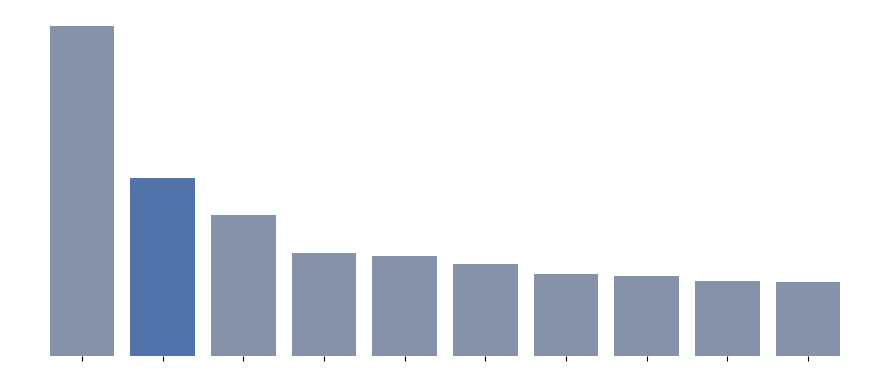

In [14]:
tic = 'TICKER'
liq = 'LIQUIDEZ - SOMA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ_SOMA = base_tijolo[[tic, liq, pl]]
TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']
TOP10_LIQUIDEZ_SOMA = TOP10_LIQUIDEZ_SOMA.sort_values(by=['LIQ/VP'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ_SOMA['TICKER'] = TOP10_LIQUIDEZ_SOMA['TICKER'].apply(excluir_5_dig)

data = TOP10_LIQUIDEZ_SOMA


# Criar o DataFrame
df = pd.DataFrame(data)

cores = ['#8592AA' if fundo != 'GARE11' else '#5173A9' for fundo in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQ/VP'], color=cores)


# Adicionar rótulos de barra como porcentagem
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:.2%}',  # Formatar como porcentagem
        ha='center', va='bottom', color = 'white', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=360)

for tick in ax.get_xticklabels():
    tick.set_color('white')

ax.spines['bottom'].set_color('white')
plt.tight_layout()

fig.savefig('TOP10_LIQSOMAxPL.png', transparent=True, dpi=300, bbox_inches = 'tight')

# Exibir o gráfico
plt.show()